[2025-06-07 Fiddler](https://thefiddler.substack.com/p/can-you-crack-the-roman-code)
====================

Fiddler
-------
This kind of problem is easier to solve with code than with thinking.

In [1]:
from functools import cache

@cache
def combinations(code, digits):
    count = 0
    for digit in digits:
        if code == digit:
            count += 1
        elif code[0:len(digit)] == digit:
            count += combinations(code[len(digit):], digits)
    return count

In [2]:
combinations("IIIIIIIIII",frozenset({"I","II","III"}))

274

Extra credit
------------

In [3]:
combinations("IIIVIIIVIIIVIII",frozenset({"I","II","III","IV","V","VI","VII","VIII"}))

4000

With thinking
-------------
To get the answers by thinking instead of code, work backwards.

### Fiddler
|Remaining code|ways|
|--------------|----|
|I             |1   |
|II            |1+I = 2 |
|III           |1+I+II = 4 |
|IIII          |I+II+III = 7 |
|IIIII         |II+III+IIII = 13 |
|IIIIII        |III+IIII+IIIII = 24 |
|IIIIIII       |IIII+IIIII+IIIIIII = 44 |
|IIIIIIII      |IIIII+IIIIII+IIIIIII = 81 |
|IIIIIIIII     |IIIIII+IIIIIII+IIIIIIII = 149 |
|IIIIIIIIII    |IIIIIII+IIIIIIII+IIIIIIIII = 274 |

This is [A000073 in OEIS](https://oeis.org/A000073), the "tribonacci numbers".

### Extra credit
|Remaining code |ways|
|---------------|----|
|I              |1   |
|II             |1+I = 2 |
|III            |1+I+II = 4 |
|VIII           |1+I+II+III = 8 |
|IVIII          |III+VIII = 12 |
|IIVIII         |VIII+IVIII = 20 |
|IIIVIII        |VIII+IVIII+IIVIII = 40 |
|VIIIVIII       |VIII+IVIII+IIVIII+IIIVIII = 80 |
|IVIIIVIII      |IIIVIII+VIIIVIII = 120 |
|IIVIIIVIII     |VIIIVIII+IVIIIVIII = 200 |
|IIIVIIIVIII    |VIIIVIII+IVIIIVIII+IIVIIIVIII = 400 |
|VIIIVIIIVIII   |VIIIVIII+IVIIIVIII+IIVIIIVIII+IIIVIIIVIII = 800 |
|IVIIIVIIIVIII  |IIIVIIIVIII+VIIIVIIIVIII = 1200 |
|IIVIIIVIIIVIII |VIIIVIIIVIII+IVIIIVIIIVIII = 2000 |
|IIIVIIIVIIIVIII|VIIIVIIIVIII+IVIIIVIIIVIII+IIVIIIVIIIVIII = 4000 |

Making the $\lfloor$rounds$\rceil$
----------------------------------
First, find the centroids.

In [4]:
xc = integral(x*sqrt(1-x^2), x, 0, 1)/integral(sqrt(1-x^2), x, 0, 1)
rc = xc*sqrt(2)
xc

4/3/pi

In [5]:
def mtr(x, y, offset=(0,0), theta=pi/4):
    (xo,yo) = offset
    result = circle((xo,yo),1,axes=false)
    c = rc*cos(theta)
    s = rc*sin(theta)
    for (xp,yp) in [(-c,s),(c,-s),(-s,-c)]:
        result += circle((xo+xp,yo+yp),0.05,fill=true,color='gray')
        xb = (x+xp)/2
        yb = (y+yp)/2
        if x == xp:
            result += line([(xo-1,yo+yb),(xo+1,yo+yb)],color='gray',linestyle='dotted')
        elif y == yp:
            result += line([(xo+xb,yo-1),(xo+xb,yo+1)],color='gray',linestyle='dotted')
        else:
            dx = x-xp
            dy = y-yp
            # (x-xb)/(y-yb) = - dy/dx
            # x = xb - (y-yb)*dy/dx
            # y = yb - (x-xb)*dx/dy
            xtop = xb-(1-yb)*dy/dx
            xbot = xb-(-1-yb)*dy/dx
            yleft = yb-(-1-xb)*dx/dy
            yright = yb-(1-xb)*dx/dy
            if abs(xtop) <= 1:
                if abs(xbot) <= 1:
                    result += line([(xo+xtop,yo+1),(xo+xbot,yo-1)],color='gray',linestyle='dotted')
                elif abs(yleft) <= 1:
                    result += line([(xo+xtop,yo+1),(xo-1,yo+yleft)],color='gray',linestyle='dotted')
                else:
                    result += line([(xo+xtop,yo+1),(xo+1,yo+yright)],color='gray',linestyle='dotted')
            elif abs(xbot) <= 1:
                if abs(yleft) <= 1:
                    result += line([(xo+xbot,yo-1),(xo-1,yo+yleft)],color='gray',linestyle='dotted')
                else:
                    result += line([(xo+xbot,yo-1),(xo+1,yo+yright)],color='gray',linestyle='dotted')
            else:
                result += line([(xo-1,yo+yleft),(xo+1,yo+yright)],color='gray',linestyle='dotted')
    result += circle((xo+x,yo+y),0.05,fill=true,color='red')
    return result

Two analytically tractable approaches appear to be moving from the fourth centroid
towards the opposite centroid and towards one of the other centroids.

First, consider moving towards the opposite centroid.

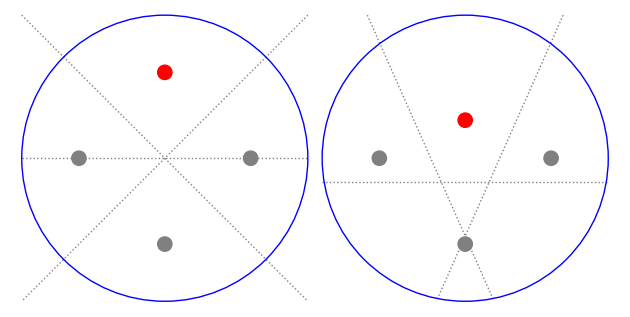

In [6]:
mtr(0,rc,theta=0) + mtr(0,0.265918,offset=(2.1,0),theta=0)

In [7]:
x,y,xp,yp = var('x,y,xp,yp')
y0 = (yp-rc)/2
x1 = rc/2
y1 = yp/2
dx = rc
dy = -yp
right_line = (x-x1)/(y-y1) == -dy/dx
x0 = solve(right_line.substitute(y == y0), x)[0].rhs()
perimeters = solve((solve(right_line, y)[0]^2).substitute(y^2 == 1-x^2), x)
xperimeter = perimeters[1].rhs()
yperimeter = sqrt(1-xperimeter^2)
#area = 2*integral(sqrt(1-x^2)-y0, x, 0, xperimeter) - (yperimeter-y0)*(xperimeter-x0)
# areac(x,y) = integral(sqrt(1-t^2)-y,t,0,x)
areac(x,y) = -x*y + 1/2*sqrt(1-x^2)*x + arcsin(x)/2
area = 2*areac(xperimeter,y0) - (yperimeter-y0)*(xperimeter-x0)

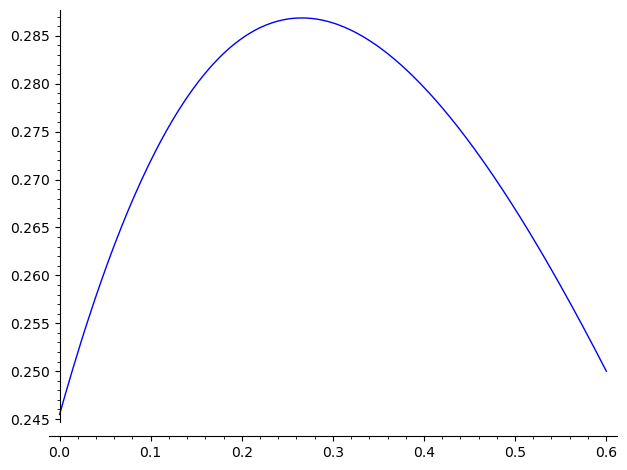

In [8]:
plot(area/pi, yp, 0, xc*sqrt(2))

In [9]:
find_local_maximum(area/pi, 0, rc)

(0.2868636590470765, 0.26591790460479037)

Next, consider moving from the centroid towards an adjacent centroid.

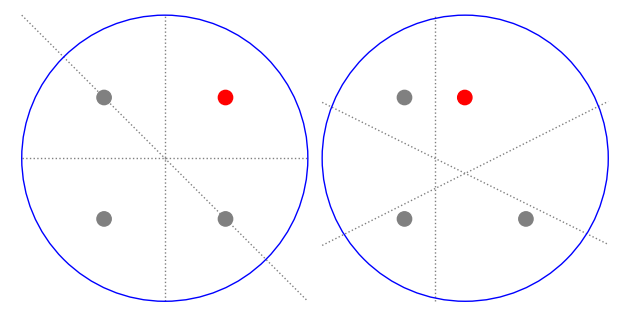

In [10]:
mtr(xc,xc) + mtr(-0.002892,xc,offset=(2.1,0))

In [11]:
x0 = (xp - xc)/2
dxl = xp + xc
dy = 2*xc
left_line = (x-x0)/y == -dy/dxl
xr = (xp+xc)/2
dxr = xp - xc
right_line = (x-xr)/y == -dy/dxr
intersection = solve([left_line, right_line], [x,y])
xintersection = intersection[0][0].rhs()
perimeters = solve((right_line^2).substitute(y == sqrt(1 - x^2)), x)
xperimeter = perimeters[1].rhs()
yperimeter = sqrt(1-xperimeter^2)
y0l = solve(left_line, y)[0].rhs().substitute(x == x0)
y0r = solve(right_line, y)[0].rhs().substitute(x == x0)
# area = integral(sqrt(1-x^2)-yperimeter, x, -x0, xperimeter) \
#    + (xperimeter-x0)*(yperimeter-y0r)/2 - (xintersection-x0)*(y0l-y0r)/2
area = areac(-x0, yperimeter) + areac(xperimeter, yperimeter) \
    + (xperimeter-x0)*(yperimeter-y0r)/2 - (xintersection-x0)*(y0l-y0r)/2

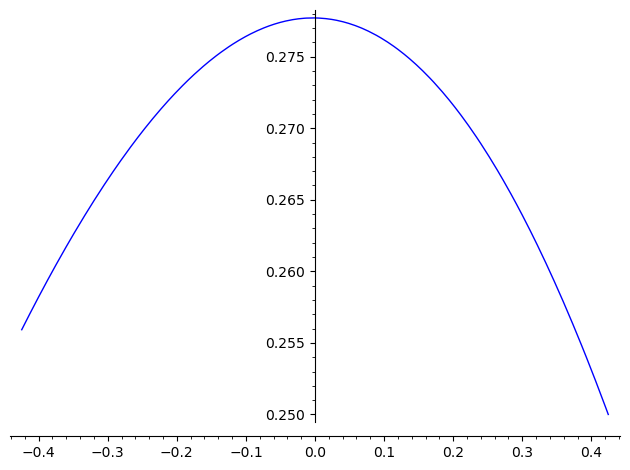

In [12]:
plot(area/pi, xp, -xc, xc)

In [13]:
find_local_maximum(area/pi, -xc, xc)

(0.27770932297488893, -0.0028921291521913518)

An idea to make a more general calculation more tractable is to rotate
the fixed centroids and considering points with the same $x$ or $y$ position
as one of the centroids so that one of the boundaries of the area is
horizontal or vertical, making the integrals easier.

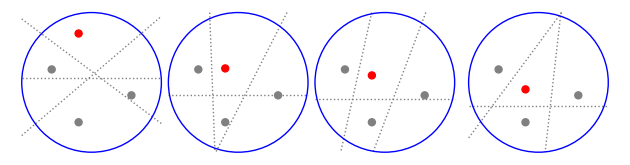

In [14]:
t = pi/10
(mtr(-rc*sin(t),0.7,theta=t)
 + mtr(-rc*sin(t),0.2,theta=t,offset=(2.1,0))
 + mtr(-rc*sin(t),0.1,theta=t,offset=(4.2,0))
 + mtr(-rc*sin(t),-0.1,theta=t,offset=(6.4,0))
)

In [15]:
theta = var('theta')
xcl = -rc*cos(theta)
ycl = rc*sin(theta)
xcb = -rc*sin(theta)
ycb = -rc*cos(theta)
xcr = rc*cos(theta)
ycr = -rc*sin(theta)
y0 = (yp+ycb)/2
left_line = ((x - (xp+xcl)/2)/(y - (yp+ycl)/2) == - (yp-ycl)/(xp-xcl)).substitute(xp == xcb)
right_line = ((x - (xp+xcr)/2)/(y - (yp+ycr)/2) == - (yp-ycr)/(xp-xcr)).substitute(xp == xcb)
x0l = solve(left_line.substitute(y == y0), x)[0].rhs()
x0r = solve(right_line.substitute(y == y0), x)[0].rhs()
ypmax = solve(x0l == x0r, yp)[0].rhs()
xperiml = solve((solve(left_line, y)[0]^2).substitute(y == sqrt(1-x^2)),x)[1].rhs()
yperiml = sqrt(1 - xperiml^2)
xperimr = solve((solve(right_line, y)[0]^2).substitute(y == sqrt(1-x^2)),x)[1].rhs()
yperimr = sqrt(1 - xperimr^2)
# cross = solve([left_line, right_line], [x, y])
# xcross = cross[0][0].rhs()
# ycross = cross[0][1].rhs()
# ypmin = solve(xcross^2 + ycross^2 == 1, yp)[0].rhs()
area = -areac(xperiml,y0)+areac(xperimr,y0)-(yperiml-y0)*(x0l-xperiml)/2-(yperimr-y0)*(xperimr-x0r)/2

(0, 0.2868636590470766, 0.2659179134822873)
(0.100000000000000, 0.28635203333502063, 0.26851122124578114)
(0.200000000000000, 0.28482075770198984, 0.2763595402114188)
(0.250000000000000, 0.28367576252839793, 0.2823112966506991)
(0.300000000000000, 0.2822802511012759, 0.28965870712244546)
(0.400000000000000, 0.27874711724986284, 0.30869119391035715)
(0.500000000000000, 0.2742456075268125, 0.3336982328083586)
(0.600000000000000, 0.268819255131778, 0.36447199900344796)
(0.700000000000000, 0.2625832225018124, 0.3989194801832876)
(0.750000000000000, 0.2592629354723629, 0.41516848311842536)


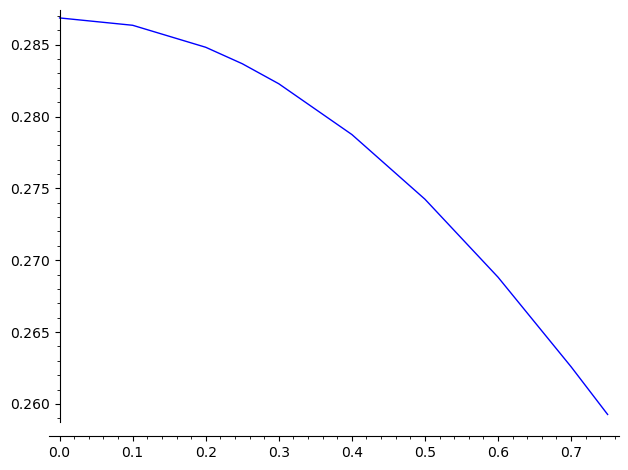

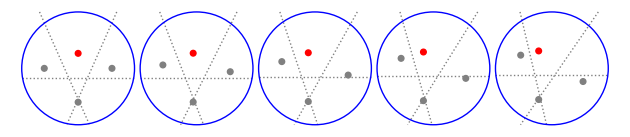

In [16]:
pts = []
for t in [0,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75]:
    m = find_local_maximum(area(theta=t)/pi,ycl(theta=t),ypmax(theta=t))
    print((t,m[0],m[1]))
    pts.append((t,m[0]))
show(line(pts))
t = 0
m = find_local_maximum(area(theta=t)/pi,ycl(theta=t),ypmax(theta=t))
result = mtr(-rc*sin(t),m[1],theta=t)
for (t,offset) in [(0.1,(2.1,0)),(0.2,(4.2,0)),(0.3,(6.3,0)),(0.4,(8.4,0))]:
    m = find_local_maximum(area(theta=t)/pi,ycl(theta=t),ypmax(theta=t))
    result += mtr(-rc*sin(t),m[1],theta=t,offset=offset)
result

And I am convinced that the maximum area is approximately 28.686% of the circle, which
is when $\theta = 0$, so the point is equidistant at approximately 0.65648 from the two
adjacent centroids and approximately 0.86613 from the opposite centroid.

In [17]:
(numerical_approx(0.26591790460479037+rc),
 numerical_approx(sqrt(0.26591790460479037^2+rc^2)))

(0.866128782042861, 0.656479572709145)